In [1]:
import numpy as np
import matplotlib.pyplot as plt


class KNN:
    def __init__(self, name: str, data_file_path: str, output_path: str, n_values: list, skip_variance: bool = False):
        self.name = name
        self.output_path = output_path

        self.n_values = n_values

        self.skip_variance = skip_variance

        self.num_validation_sets = 5  # same number of validation sets for all experiments

        self.m = 50  # same number of training points for all experiments

        self.K = np.arange(1, self.m + 1)  # same K values for all experiments

        self.y_max_validation = 0.65  # same y_max for validation plots for all experiments

        # Same labels will be used for all the experiments
        labels_file_path = "data/MNIST-5-6-Subset-Labels.txt"
        labels = np.loadtxt(labels_file_path)
        self.labels = np.where(labels == 5, -1, 1)  # convert labels from {5, 6} to {-1, 1}

        self.data = np.loadtxt(data_file_path).reshape(1877, 784)  # load data and reshape into 1877 rows and 784 columns

        # Define training points and labels
        self.training_points = self.data[: self.m]
        self.training_labels = self.labels[: self.m]

    def knn(self, test_point, test_label):
        # 2. Calculate pairwise distances (d_i = d(x_i, x)) between test point and training points using euclidean distance.
        distances = np.sum(np.square((self.training_points - test_point)), axis=1)

        # 3. Sort distances (d_i's) in ascending order and get corresponding indices
        distances_sorted_indices = np.argsort(distances)

        # 4. Calculate the summed up sign of the labels of the K nearest neighbors (majority vote).
        ys = np.sign(np.cumsum(self.training_labels[distances_sorted_indices]))

        # If voting tie, only look at the K-1 neighbors.
        # Wherever ys=0 (i.e. a tie), replace it with the value one position to the right (i.e. label of previous neighbor),
        # otherwise keep the original value of ys."
        ys = np.where(ys == 0, np.roll(ys, 1), ys)  # np.roll(ys, 1) shifts array one position to the right

        errors = np.where(ys != test_label, 1, 0)

        return errors

    def validation(self):
        if not self.skip_variance:
            fig1, ax1 = plt.subplots(figsize=(8, 5))

        for n in self.n_values:
            fig2, ax2 = plt.subplots(figsize=(8, 5))

            mean_validation_errors_of_sets = []

            for i in range(self.num_validation_sets):
                # Define validation set
                start_idx = self.m + i * n
                end_idx = self.m + (i + 1) * n

                validation_points = self.data[start_idx:end_idx]
                validation_labels = self.labels[start_idx:end_idx]

                # Calculate mean validation error for each K
                mean_validation_errors_of_set = self._mean_validation_error(validation_points, validation_labels)

                ax2.plot(self.K, mean_validation_errors_of_set, label=f"Validation set {i+1}")

                if self.skip_variance:
                    continue
                # Calculate variance of validation error for comparing validation sets
                mean_validation_errors_of_sets.append(mean_validation_errors_of_set)

            # Plot the mean validation error as a function of K
            ax2.set_xlabel("K", fontsize=12)
            ax2.set_ylabel("Validation error", fontsize=12)
            ax2.set_title(f"{self.name}: Validation error\nK=(1,...,{self.m}); m={self.m}; n={n}", fontsize=14)
            ax2.grid(alpha=0.2)
            ax2.legend()
            ax2.set_ylim([0, self.y_max_validation])
            fig2.tight_layout()
            fig2.savefig(self.output_path + f"/validation_err_n={n}.png")

            if self.skip_variance:
                continue
            # Stack the validation errors, so that we can calculate the variance of n
            mean_validation_errors_stacked_of_sets = np.vstack(mean_validation_errors_of_sets)
            variance_of_n = np.var(mean_validation_errors_stacked_of_sets, axis=0)

            # Plot the variance of the validation error as a function of K
            ax1.plot(self.K, variance_of_n, label=f"n={n}")
            ax1.set_xlabel("K", fontsize=12)
            ax1.set_ylabel("Variance of validation error", fontsize=12)
            ax1.set_title(f"{self.name}: Variance of validation error\nK=(1,...,{self.m}); m={self.m}", fontsize=14)
            ax1.grid(alpha=0.2)
            ax1.legend()

        if not self.skip_variance:
            fig1.tight_layout()
            fig1.savefig(self.output_path + f"/variance_of_validation_error.png")

        plt.show()

    def _mean_validation_error(self, validation_points: np.ndarray, validation_labels: np.array):
        validation_errors = np.zeros(self.m)

        for validation_point, validation_label in zip(validation_points, validation_labels):
            validation_error = self.knn(validation_point, validation_label)
            validation_errors += validation_error

        # Divide by n to get the average error for each K
        mean_validation_errors = validation_errors / validation_labels.shape[0]  # validation_labels.shape[0] = n

        return mean_validation_errors

# Uncorrupted experiment

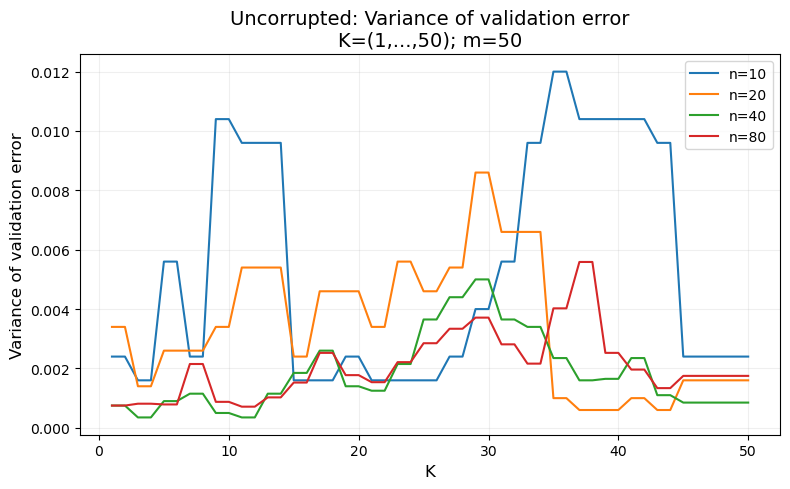

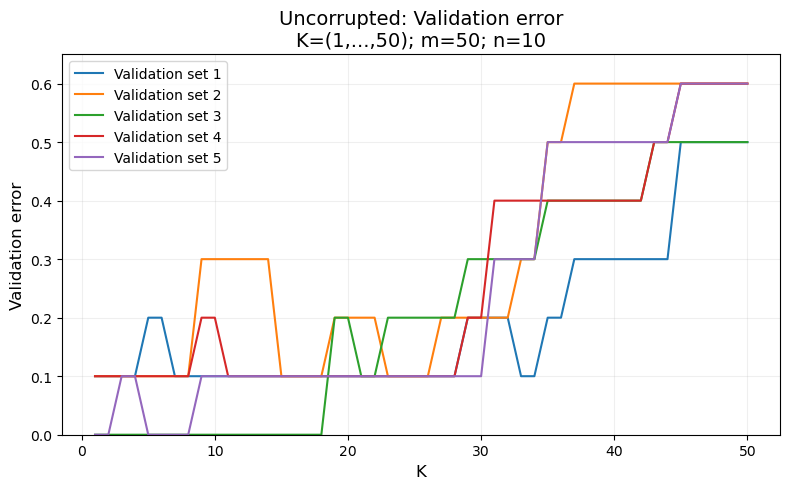

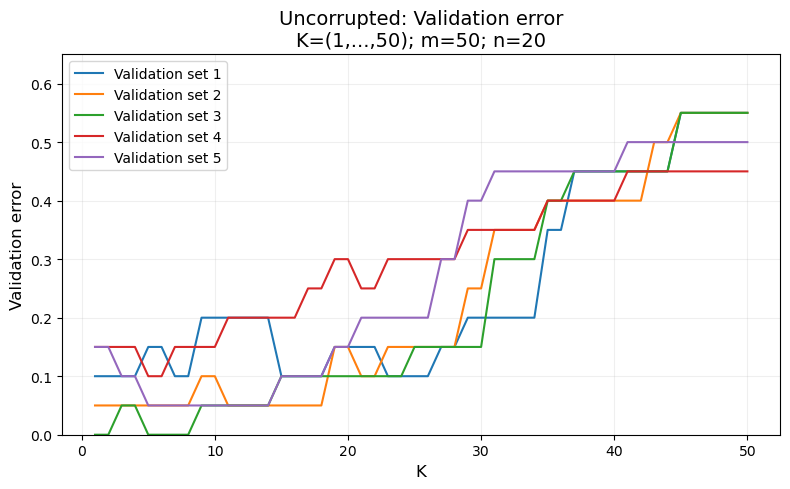

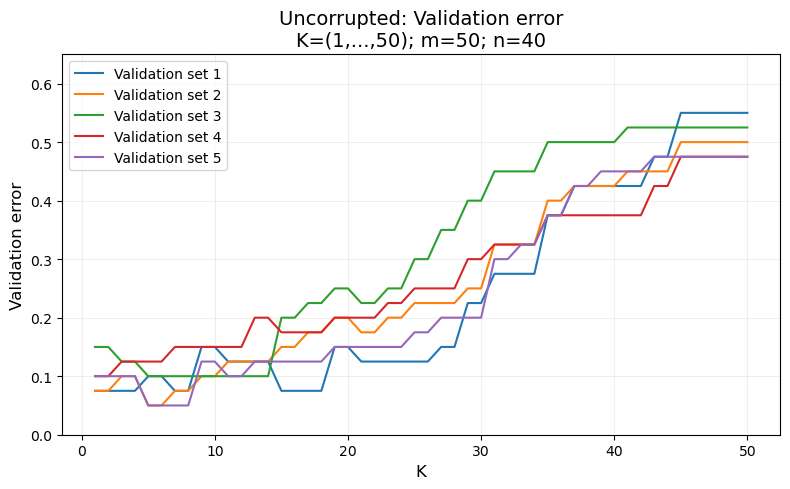

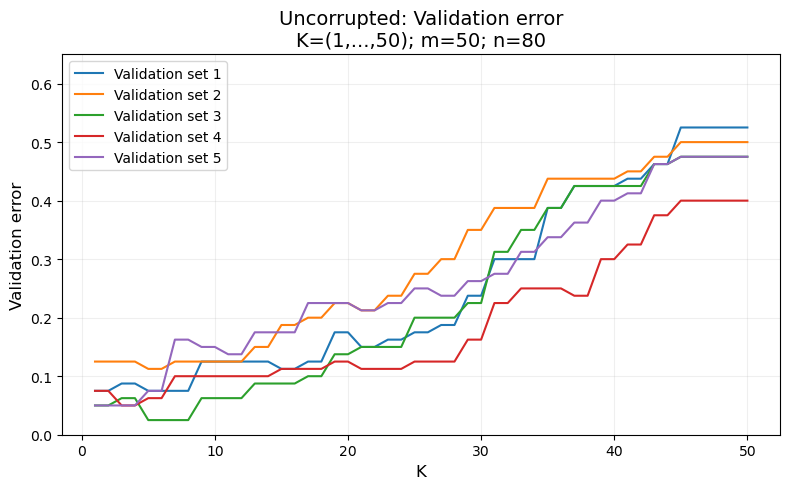

In [2]:
uncorrupted = KNN(name="Uncorrupted", data_file_path="data/MNIST-5-6-Subset.txt", output_path="images/uncorrupted", n_values=[10, 20, 40, 80])
uncorrupted.validation()

# Light corruption experiment

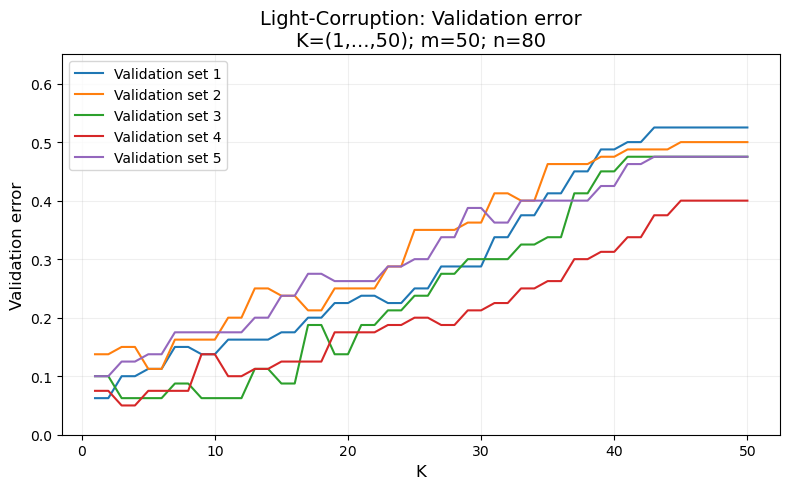

In [3]:
light_corruption = KNN(
    name="Light-Corruption",
    data_file_path="data/MNIST-5-6-Subset-Light-Corruption.txt",
    output_path="images/light_corruption",
    n_values=[80],
    skip_variance=True,
)
light_corruption.validation()

# Moderate corruption experiment

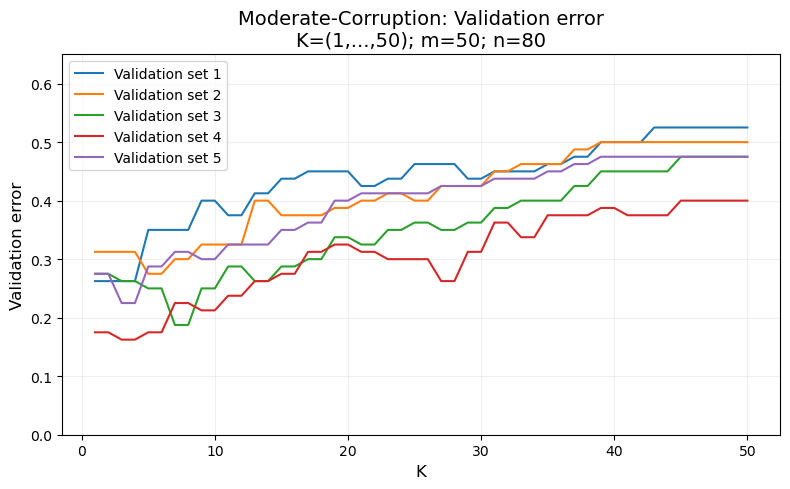

In [4]:
moderate_corruption = KNN(
    name="Moderate-Corruption",
    data_file_path="data/MNIST-5-6-Subset-Moderate-Corruption.txt",
    output_path="images/moderate_corruption",
    n_values=[80],
    skip_variance=True,
)
moderate_corruption.validation()

# Heavy corruption experiment

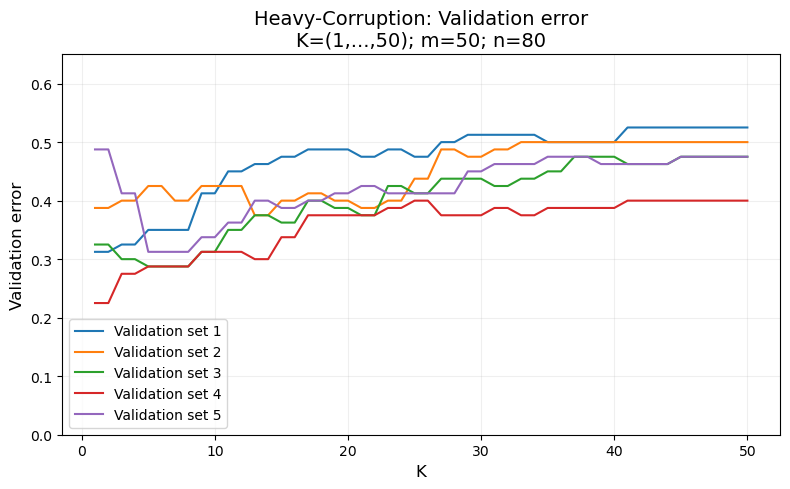

In [5]:
heavy_corruption = KNN(
    name="Heavy-Corruption",
    data_file_path="data/MNIST-5-6-Subset-Heavy-Corruption.txt",
    output_path="images/heavy_corruption",
    n_values=[80],
    skip_variance=True,
)
heavy_corruption.validation()